# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error

# Preprocessing

In [2]:
# Read Data
train_full_raw = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv', index_col='Id')
test_full_raw = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv', index_col='Id')

In [3]:
train_full = train_full_raw.copy()
test_full = test_full_raw.copy()

print(f"Train_full_raw.shape: {train_full.shape}")
print(f"Test_full_raw.shape: {test_full.shape}")

Train_full_raw.shape: (1460, 80)
Test_full_raw.shape: (1459, 79)


## Descriptive Data

In [4]:
train_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_full.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


## Select Target Variable (SalePrice)

In [6]:
# Remove rows with missing target, separate target from predictors
train_full.dropna(axis=0, subset=['SalePrice'], inplace=True)

y = train_full['SalePrice'].copy()

train_full.drop(['SalePrice'], axis=1, inplace=True)

# Exploratory Data Analysis of Preprocessing

## Visualiza  Target Variable (SalePrice)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


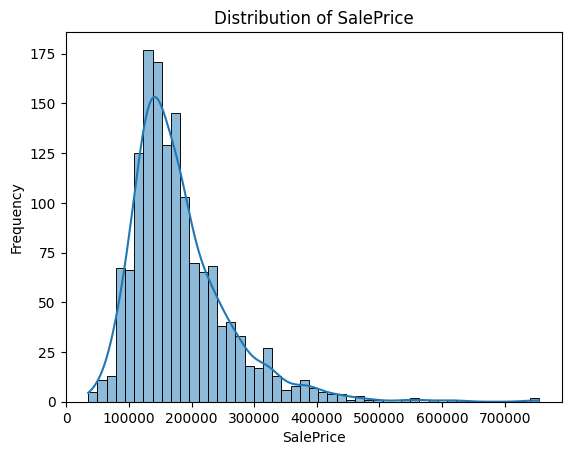

In [7]:
sns.histplot(y, kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

### 因為 SalePrice 的 Distribution Plot 為 right-skewd -> 取 log 可以接近常態分布。


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


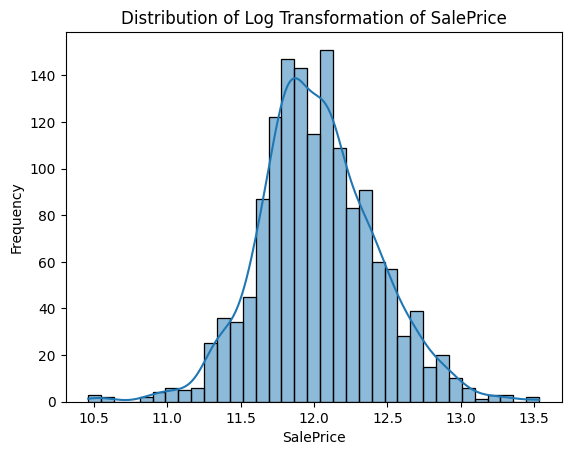

In [8]:
# log1p(x) avoids floating-point precision errors when x is near 0.
y = np.log1p(y)

sns.histplot(y, kde=True)
plt.title('Distribution of Log Transformation of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

## Check for Missing Values & Visualize

In [9]:
missing_values_check = train_full.isnull().sum().sort_values(ascending=False)
missing_values_check[missing_values_check > 0]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageQual        81
GarageFinish      81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [10]:
missing_values_600 = missing_values_check[missing_values_check > 600]
missing_values_600

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
FireplaceQu     690
dtype: int64

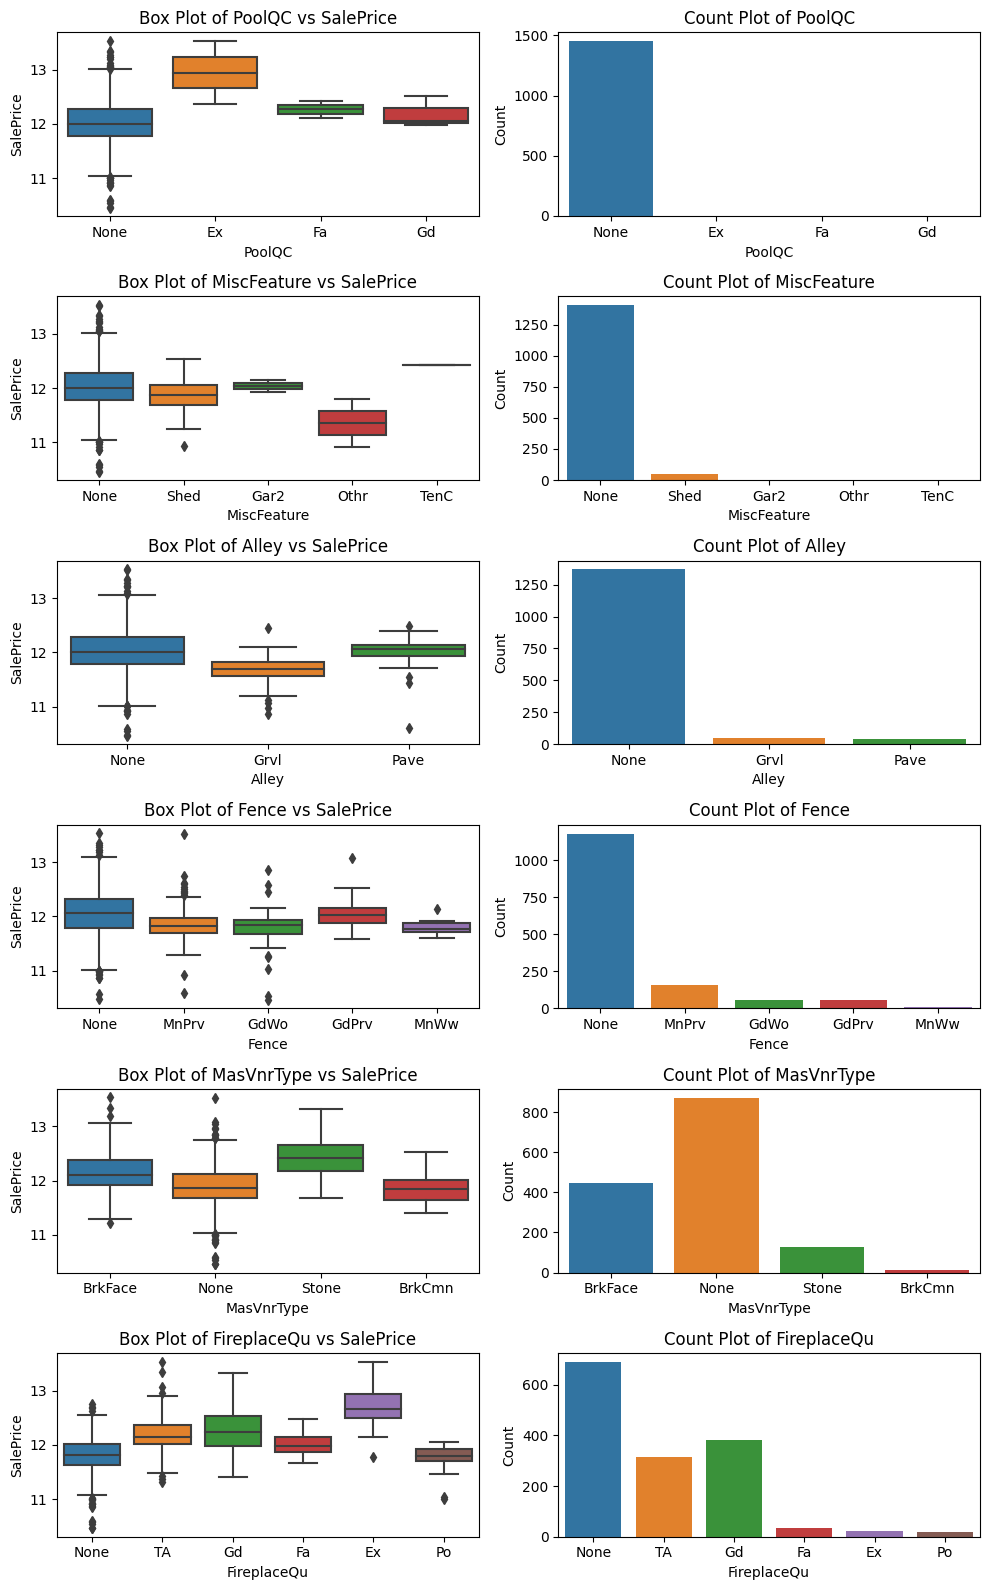

In [11]:
missing_values_600_list = missing_values_600.index.to_list()

fig, axes = plt.subplots(6, 2, figsize=(10, 16))  
axes = axes.flatten()  # Convert to a 1D array for easier indexing

for i, feature in enumerate(missing_values_600_list):
    sns.boxplot(x=train_full[feature].fillna('None'), y=y, ax=axes[2 * i])
    axes[2 * i].set_title(f"Box Plot of {feature} vs SalePrice")
    axes[2 * i].set_xlabel(feature)
    axes[2 * i].set_ylabel('SalePrice')

    sns.countplot(x=train_full[feature].fillna('None'), ax=axes[2 * i + 1])
    axes[2 * i + 1].set_title(f"Count Plot of {feature}")
    axes[2 * i + 1].set_xlabel(feature)
    axes[2 * i + 1].set_ylabel("Count")
    
plt.tight_layout()

plt.savefig("Box_Count_plot_of_missing_values.png", dpi=300, bbox_inches='tight')
plt.show()

In [12]:
drop_cols = ['PoolQC', 'Alley', 'MiscFeature', 'Fence']    

train_clean = train_full.copy()
train_clean.drop([index for index in drop_cols], axis=1, inplace=True)

test_clean = test_full.copy()
test_clean.drop([index for index in drop_cols], axis=1, inplace=True)

print(f"The Shape Before Drop = {train_full.shape}, After Drop = {train_clean.shape}")

The Shape Before Drop = (1460, 79), After Drop = (1460, 75)


In [13]:
# train_clean['HasMasonryVeneer'] = train_clean['MasVnrType'].notna().astype(int)
# train_clean.drop(['MasVnrType'], axis=1, inplace=True)

### Summary
1. Drop 'PoolQC', 'Alley', 'MiscFeature' and 'Fence'   -> There are too many missing values, and the outlier range is excessively broad.

2. Keep 'MasVnrType', 'FirePlaceQu' -> Stone has higher sale prices, it likely affects sale prices.
    * Create a binary feature (HasMasonryVeneer). 


3. Keep 'FirePlaceQu' -> From box plot: Not every house has a fireplace, but when it does, better fireplace quality tends to correlate with a higher sale price, indicating a relationship between fireplace quality and sale price.


# Break off validation set from training data

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(train_clean, y, test_size=0.2, random_state=0)

In [15]:
print(f"Size of Train data = {X_train.shape, y_train.shape}")
print(f"Size of Validation data = {X_valid.shape, y_valid.shape}")

Size of Train data = ((1168, 75), (1168,))
Size of Validation data = ((292, 75), (292,))


# Exploratory Data Analysis 2

## Selected Categorical & Numerical Columns

In [16]:
# Select categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Select numerical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

## Explore Numerical Features


In [17]:
# Compute correlation matrix
correlation_matrix = X_train[numerical_cols].corrwith(y).sort_values(ascending=False).to_frame(name='Correlation')
correlation_matrix

,Correlation
OverallQual,0.811744
GrLivArea,0.713046
GarageCars,0.698999
GarageArea,0.670404
TotalBsmtSF,0.633680
1stFlrSF,0.610599
FullBath,0.607268
YearBuilt,0.580706
YearRemodAdd,0.571831
GarageYrBlt,0.547910


In [18]:
correlation_matrix.values.mean()

0.295544675168051

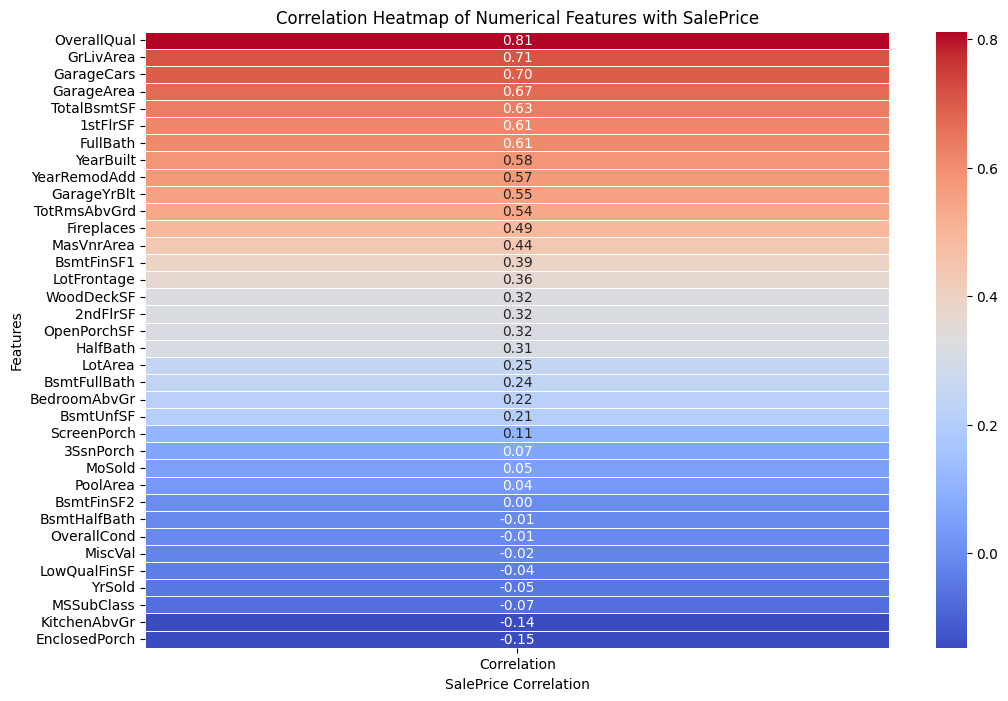

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

plt.title('Correlation Heatmap of Numerical Features with SalePrice')
plt.xlabel('SalePrice Correlation')
plt.ylabel('Features')

plt.savefig("Heatmap_of_NumericalFeatures.png", dpi=300, bbox_inches='tight')


plt.show()

In [20]:
correlation_num_cols = correlation_matrix[correlation_matrix['Correlation'] > 0.2].index.tolist()
print(correlation_num_cols)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea', 'BsmtFullBath', 'BedroomAbvGr', 'BsmtUnfSF']


### Explore Low Correlation Features

In [21]:
low_cor_num_cols = correlation_matrix[correlation_matrix['Correlation'] <= 0.2].index.tolist()
print(len(low_cor_num_cols))

13


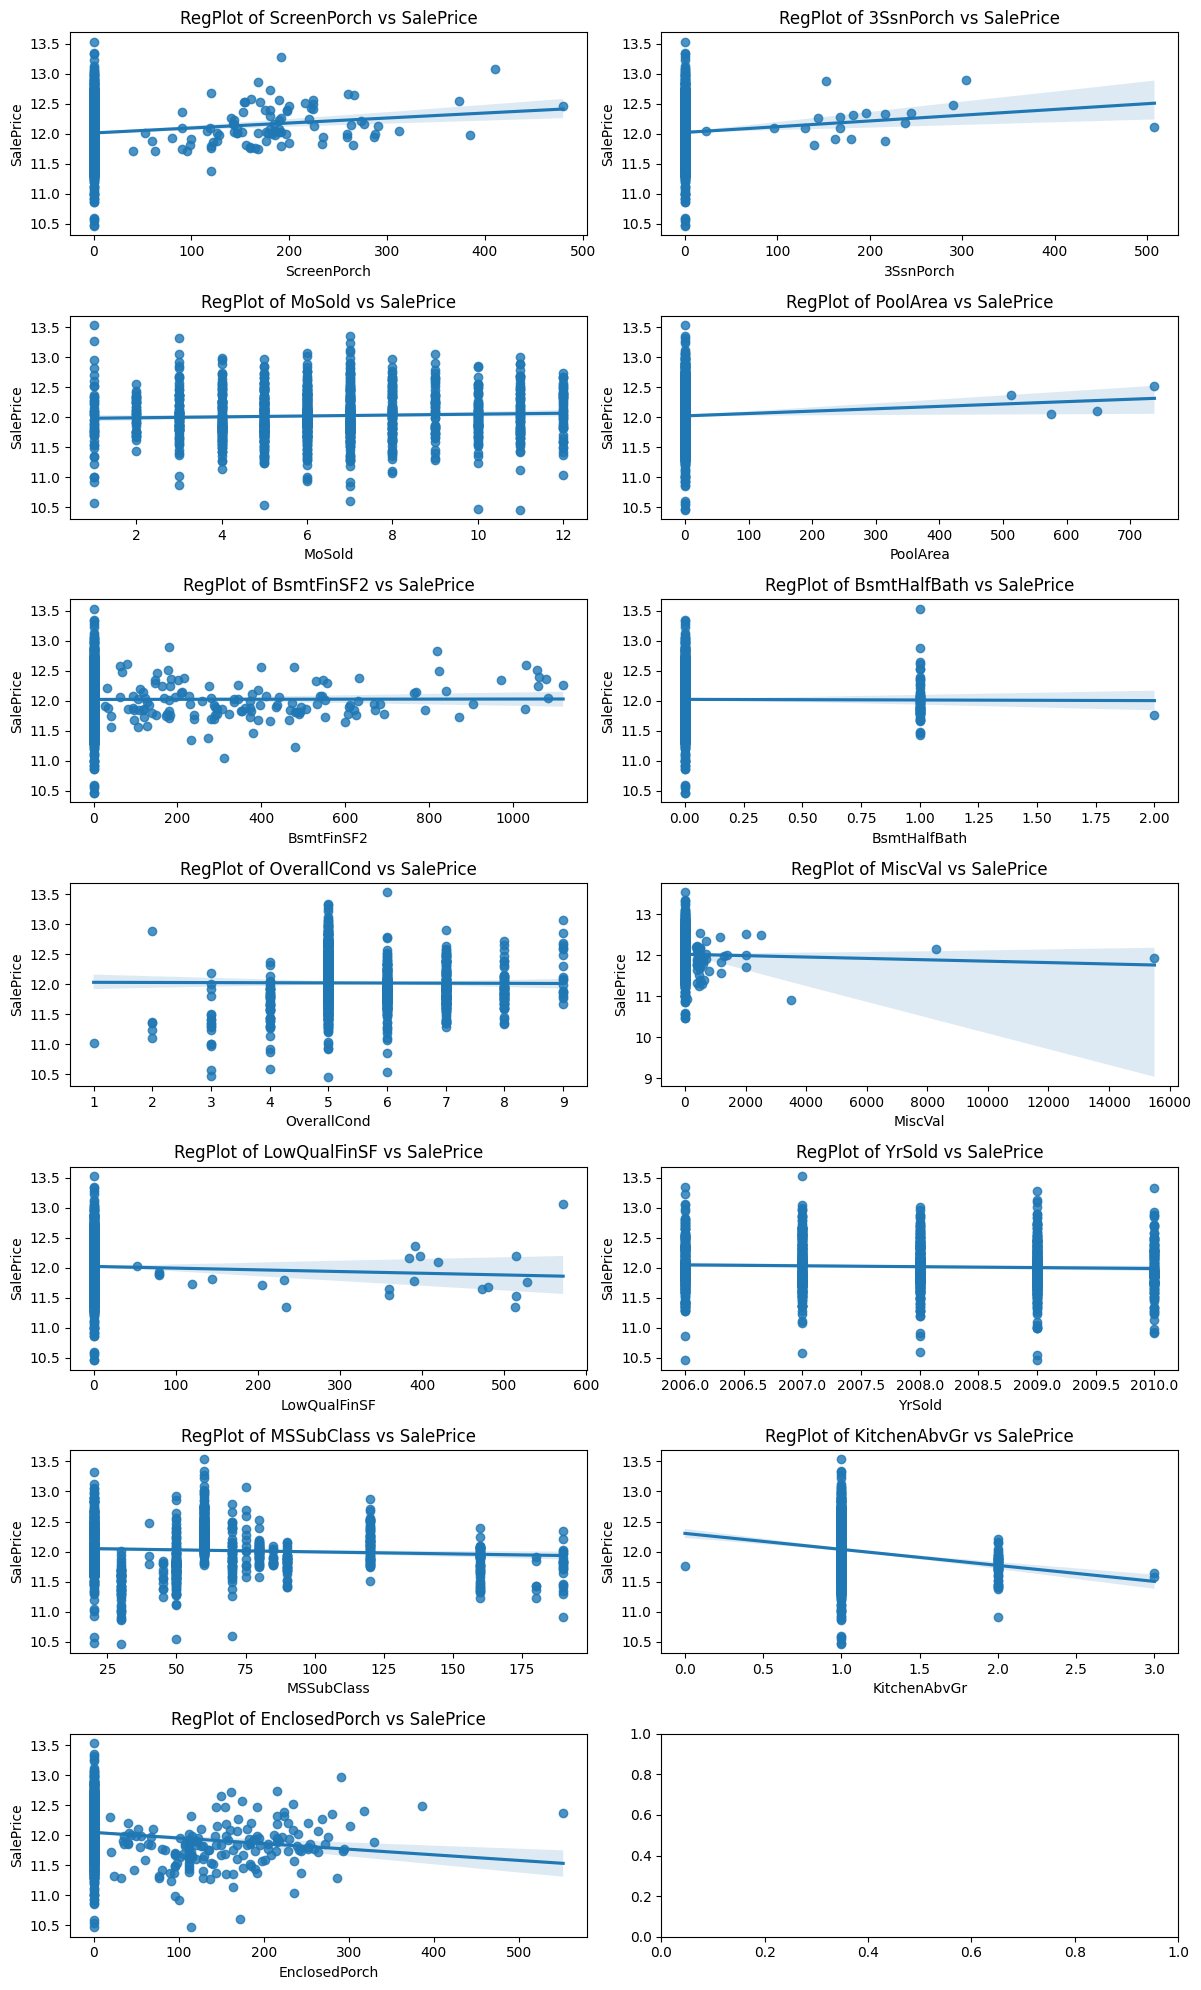

In [22]:
fig, axes = plt.subplots(7, 2, figsize=(12, 20))  
axes = axes.flatten()

for i, feature in enumerate(low_cor_num_cols):
    sns.regplot(x=X_train[feature], y=y_train, ax=axes[i])
    axes[i].set_title(f"RegPlot of {feature} vs SalePrice")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('SalePrice')

plt.tight_layout()
plt.show()

## Explore Categorical Features
### Cardinality of Categorical Features
* High-cardinality columns (e.g., Street or Neighborhood) may need encoding strategies like target encoding or one-hot encoding.


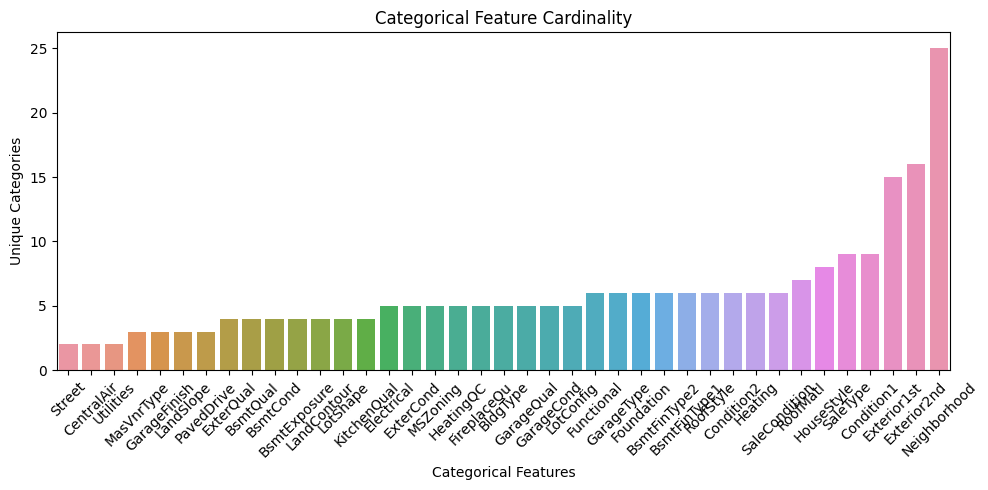

In [23]:
cat_cardinality = X_train[categorical_cols].nunique().sort_values()

plt.figure(figsize=(10, 5))
sns.barplot(x=cat_cardinality.index, y=cat_cardinality.values)
plt.xticks(rotation=45)
plt.title('Categorical Feature Cardinality')
plt.ylabel('Unique Categories')
plt.xlabel('Categorical Features')
plt.tight_layout()

plt.savefig("Barplot_of_Cardinality.png", dpi=300, bbox_inches='tight')

plt.show()


In [24]:
# Select low cardinality columns (fewer than 10 unique values)
low_cardinality_cat_cols = [cat_feature for cat_feature in X_train[categorical_cols].columns if 
                            X_train[cat_feature].nunique() < 10]
print(low_cardinality_cat_cols)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


## Keep selected columns only


In [25]:
selected_columns = correlation_num_cols + low_cardinality_cat_cols

# Pipeline

In [26]:
from sklearn.base import BaseEstimator, TransformerMixin
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  
    ('scaler', StandardScaler())])

# Preprocessing for categorical data 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, correlation_num_cols),  
        ('cat', categorical_transformer, low_cardinality_cat_cols) 
    ])

# Model

In [27]:
model = RandomForestRegressor(n_estimators=150, random_state=0)

# Bundle preprocessing and modeling code into a single pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

clf.fit(X_train, y_train)



Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['OverallQual', 'GrLivArea',
                                                   'GarageCars', 'GarageArea',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   'FullBath', 'YearBuilt',
                                                   'YearRemodAdd',
                                                   'GarageYrBlt',
                                                   'TotRmsAbvGrd', 'Fireplaces',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'LotFrontage', 'WoodDe...
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'FireplaceQu',
                                                   'GarageType', ...])])),
                ('model',
                 RandomForestRegressor(n_estimators=150, random_state=0))])

In [28]:
# trained_model = clf.named_steps['model']

# importances = trained_model.feature_importances_
# feature_names = clf.named_steps['preprocessor'].transform(X_train_preprocessed).shape[1]

# importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': importances
# })

# top10 = importance_df.sort_values(by='Importance', ascending=False).head(10)


In [29]:
from sklearn.metrics import r2_score

preds = clf.predict(X_valid)

# Convert predictions back to original scale
preds_original = np.exp(preds)
val_y_original = np.exp(y_valid)

r2 = r2_score(val_y_original, preds_original)

print(f"Mean Absolute Error of Random Forest = {mean_absolute_error(val_y_original, preds_original)}")
print(f"R^2 Score: {r2:.2f}")

Mean Absolute Error of Random Forest = 17898.266190118113
R^2 Score: 0.85


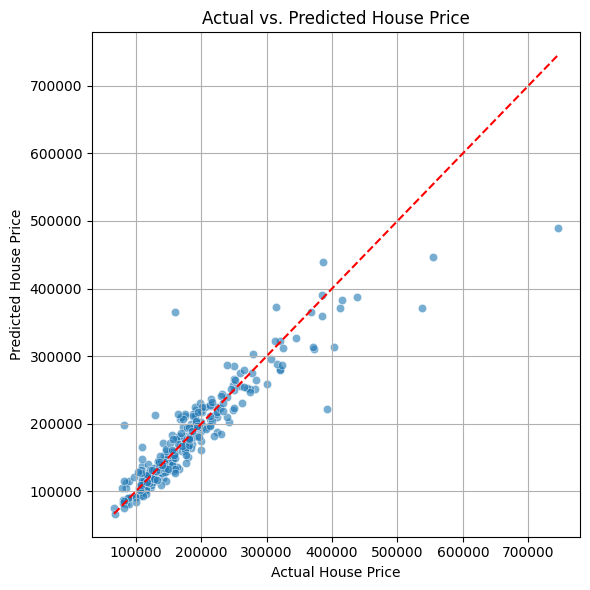

In [30]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=val_y_original, y=preds_original, alpha=0.6)
plt.plot([val_y_original.min(), val_y_original.max()], [val_y_original.min(), val_y_original.max()], color='red', linestyle='--')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs. Predicted House Price")

plt.grid(True)
plt.tight_layout()

plt.savefig("Final.png", dpi=300, bbox_inches='tight')

plt.show()

# Test Model with Test.csv

In [31]:
y_preds = clf.predict(test_full) 
y_preds_original = np.exp(y_preds)

y_preds_original[:5]

array([126840.7794863 , 149028.66882239, 181238.77621807, 181856.62188971,
       197676.30363877])

In [32]:
output = pd.DataFrame({'Id': test_clean.index,
                       'SalePrice': y_preds})

output.to_csv('submission.csv', index=False)

# References
1. [Missing Values Data Visualization](https://www.kaggle.com/code/yaroslav53/housing-prices?kernelSessionId=155403570)